In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Dataset_Admission_Predict.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [4]:
df.columns = [c.replace(' ', '') for c in df.columns]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SerialNo.         400 non-null    int64  
 1   GREScore          400 non-null    int64  
 2   TOEFLScore        400 non-null    int64  
 3   UniversityRating  400 non-null    int64  
 4   SOP               400 non-null    float64
 5   LOR               400 non-null    float64
 6   CGPA              400 non-null    float64
 7   Research          400 non-null    int64  
 8   ChanceofAdmit     400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [5]:
df.loc[df['ChanceofAdmit'] < 0.8, 'ChanceofAdmit'] = 0
df.loc[df['ChanceofAdmit'] >= 0.8, 'ChanceofAdmit'] = 1

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
X = df.drop(['ChanceofAdmit','SerialNo.'],axis=1)
y = df['ChanceofAdmit']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [9]:
model = DecisionTreeClassifier()

In [10]:
model = model.fit(X_train, y_train)

In [11]:
y_pred = model.predict(X_test)


Confusion Matrix:
 [[66  6]
 [ 6 22]]


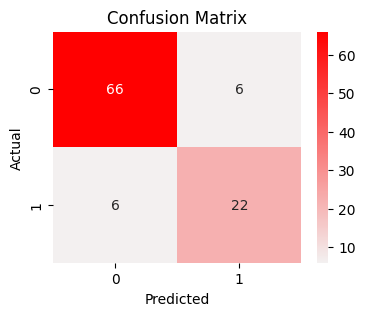

In [17]:
cm = metrics.confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap=sns.light_palette("red", as_cmap=True),)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [14]:
print("Accuracy Score:", metrics.accuracy_score(y_test, y_pred))
print("Precision Score:",metrics.precision_score(y_test, y_pred))
print("Recall Score:", metrics.recall_score(y_test, y_pred))
print("f1 Score:", metrics.f1_score(y_test, y_pred))

Accuracy Score: 0.88
Precision Score: 0.7857142857142857
Recall Score: 0.7857142857142857
f1 Score: 0.7857142857142857


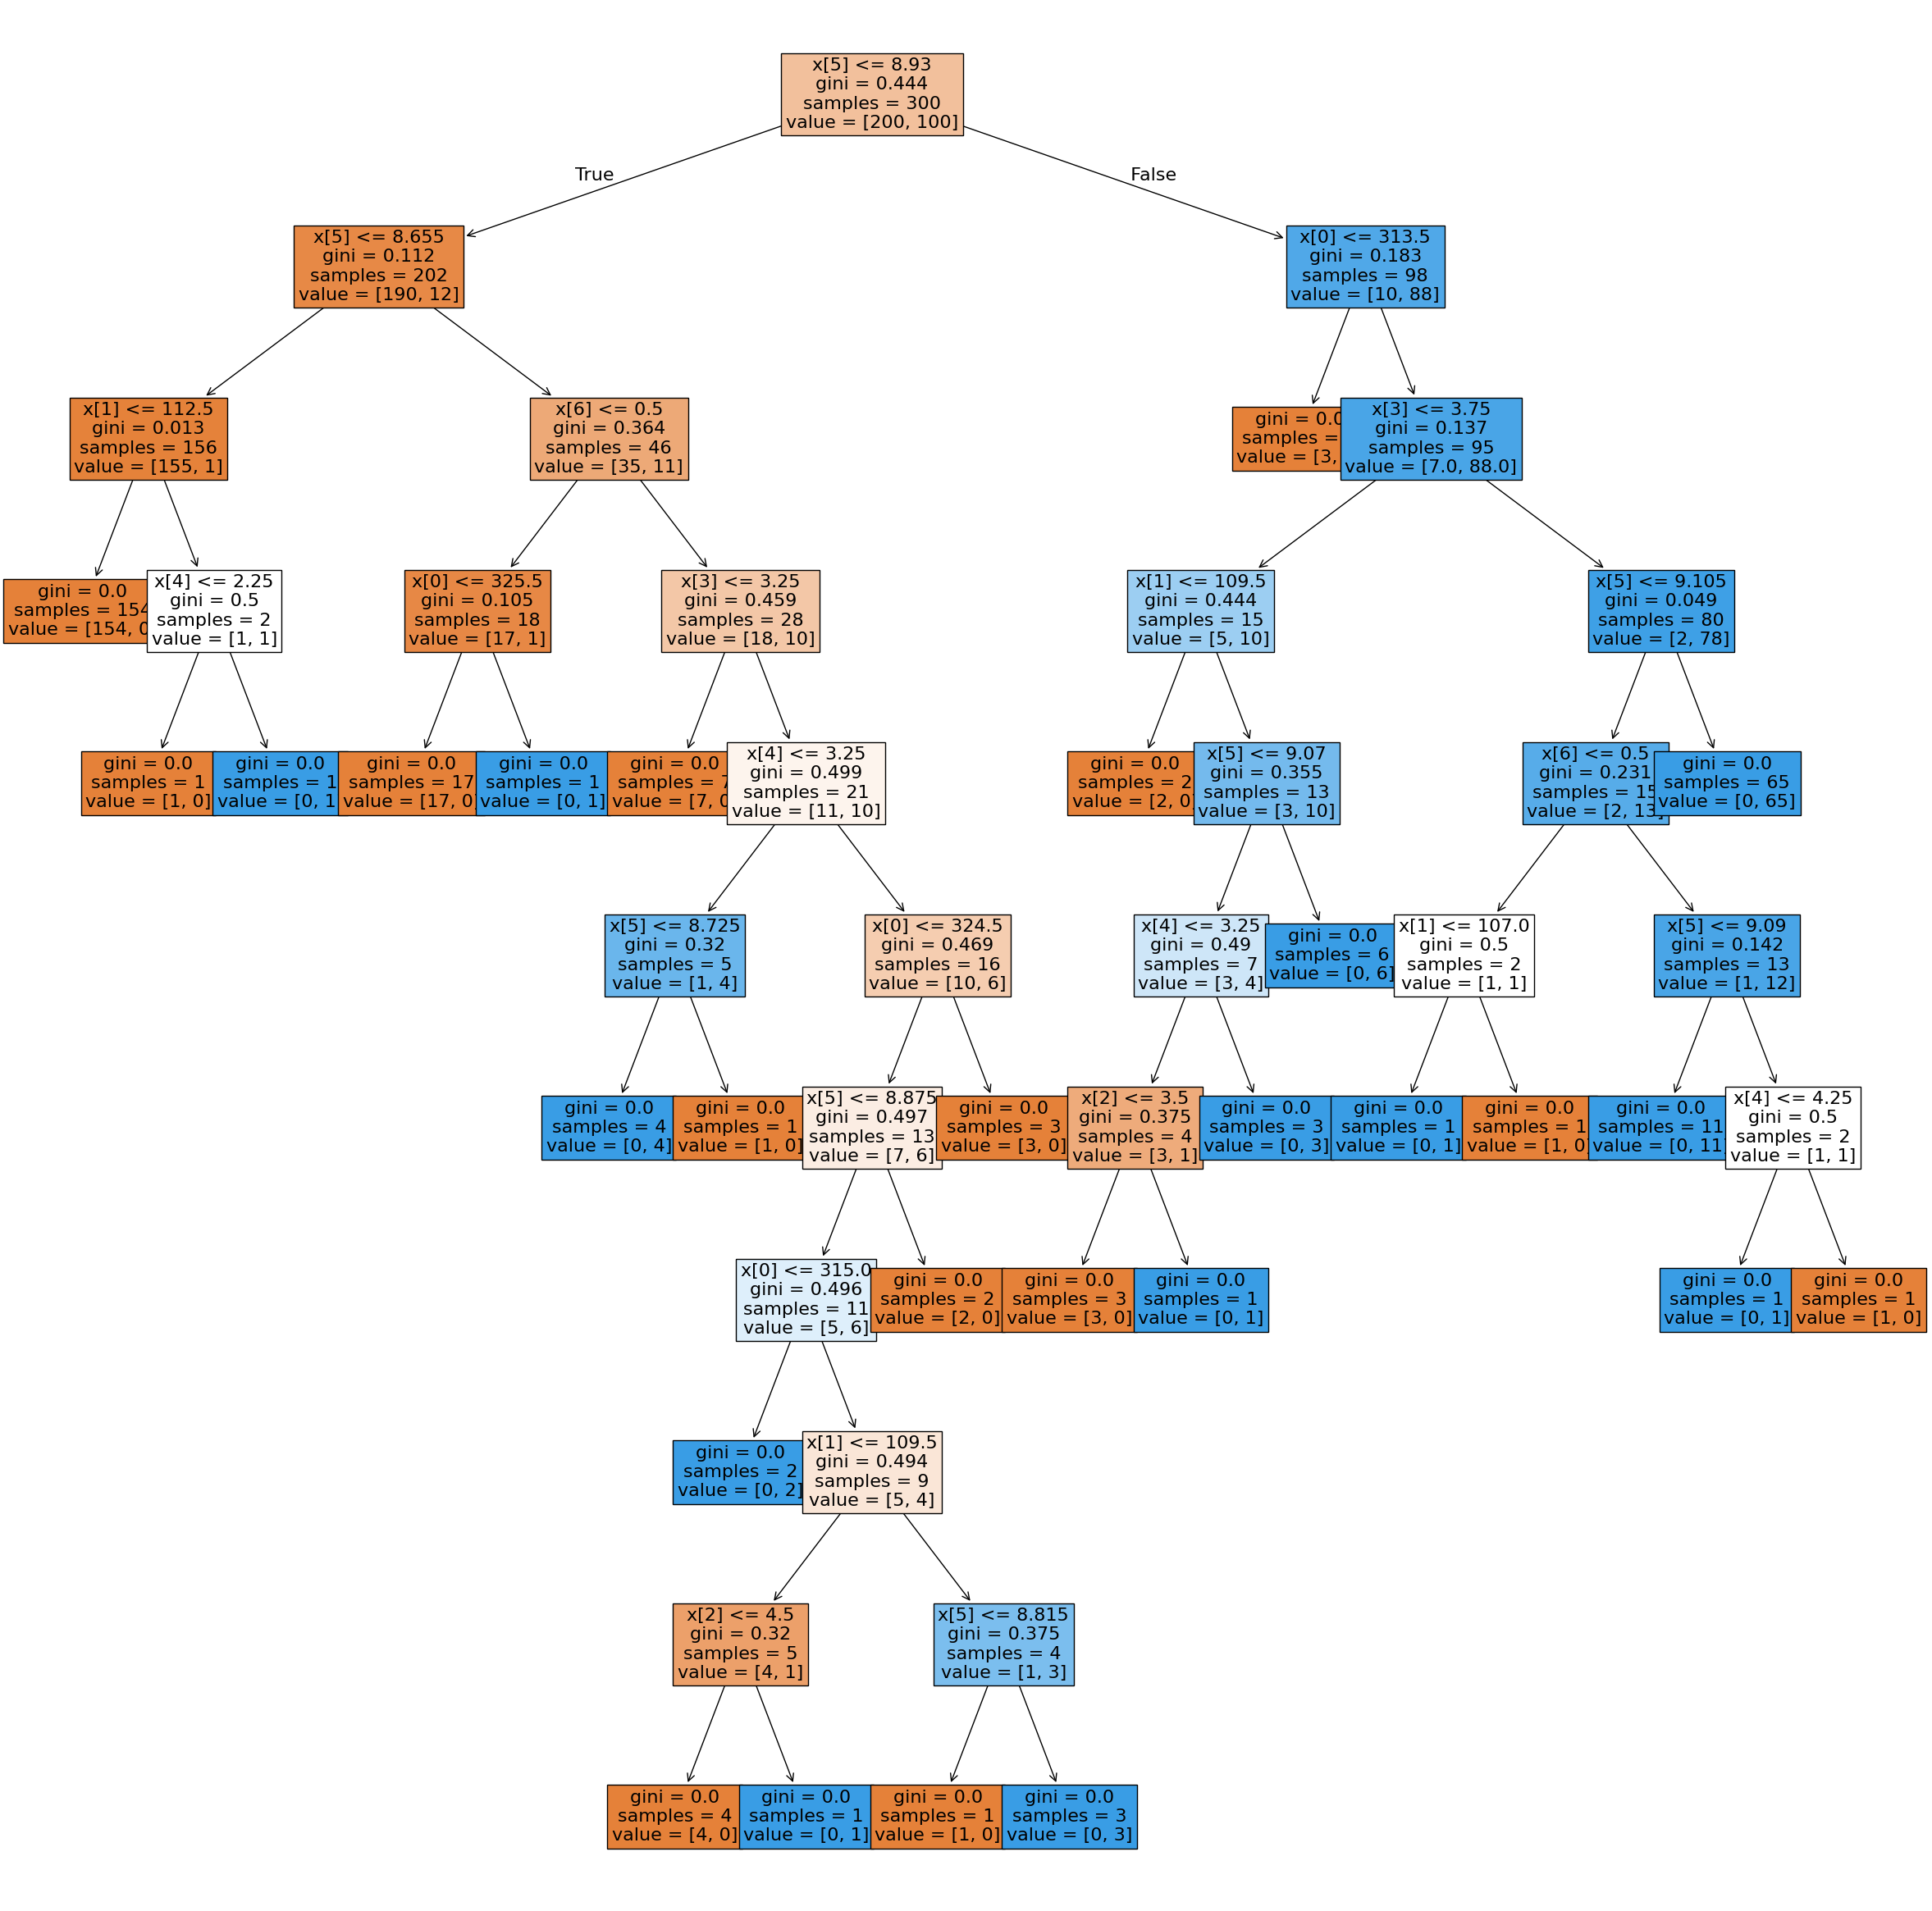

In [15]:
from sklearn import tree
plt.figure(figsize=(30,30))
tree.plot_tree(model, filled=True, fontsize=16)
plt.show()

In [16]:
print("Score:")
model.score(X_test, y_test)

Score:


0.88